In [1]:
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 1.77 ms (started: 2022-06-27 05:21:35 +00:00)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, accuracy_score

time: 981 ms (started: 2022-06-27 05:21:35 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.8 s (started: 2022-06-27 05:21:36 +00:00)


In [4]:
cd drive/MyDrive/Project_DIP/Dataset_ASL

/content/drive/MyDrive/Project_DIP/Dataset_ASL
time: 5.29 ms (started: 2022-06-27 05:21:39 +00:00)


In [5]:
directories = os.listdir()
filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + '/' + files[j]
    label.append(directories[i])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

['2/hand2_2_dif_seg_2_cropped.jpeg', '2/hand4_2_bot_seg_3_cropped.jpeg', '2/hand1_2_bot_seg_4_cropped.jpeg', '2/hand1_2_right_seg_5_cropped.jpeg', '2/hand1_2_left_seg_2_cropped.jpeg', '2/hand2_2_top_seg_4_cropped.jpeg', '2/hand4_2_bot_seg_2_cropped.jpeg', '2/hand2_2_top_seg_5_cropped.jpeg', '2/hand5_2_dif_seg_3_cropped.jpeg', '2/hand2_2_dif_seg_1_cropped.jpeg', '2/hand1_2_right_seg_2_cropped.jpeg', '2/hand4_2_bot_seg_4_cropped.jpeg', '2/hand2_2_left_seg_2_cropped.jpeg', '2/hand2_2_top_seg_1_cropped.jpeg', '2/hand5_2_bot_seg_5_cropped.jpeg', '2/hand3_2_dif_seg_2_cropped.jpeg', '2/hand5_2_bot_seg_2_cropped.jpeg', '2/hand2_2_bot_seg_4_cropped.jpeg', '2/hand3_2_dif_seg_3_cropped.jpeg', '2/hand5_2_bot_seg_1_cropped.jpeg', '2/hand1_2_right_seg_4_cropped.jpeg', '2/hand3_2_dif_seg_4_cropped.jpeg', '2/hand2_2_top_seg_3_cropped.jpeg', '2/hand2_2_right_seg_4_cropped.jpeg', '2/hand2_2_right_seg_5_cropped.jpeg', '2/hand2_2_top_seg_2_cropped.jpeg', '2/hand1_2_bot_seg_3_cropped.jpeg', '2/hand1_2_left

In [6]:
data = {"filename" : filename, 
        "label": label 
        }
df = pd.DataFrame(data=data)

df_shuffled = df.sample(frac=1)
dataset = df_shuffled
dataset

,filename,label
98,0/hand2_0_bot_seg_3_cropped.jpeg,0
1260,g/hand1_g_bot_seg_1_cropped.jpeg,g
1160,a/hand2_a_top_seg_5_cropped.jpeg,a
989,i/hand2_i_left_seg_1_cropped.jpeg,i
2405,z/hand1_z_dif_seg_1_cropped.jpeg,z
...,...,...
2261,x/hand3_x_dif_seg_4_cropped.jpeg,x
386,6/hand5_6_bot_seg_4_cropped.jpeg,6
409,6/hand1_6_dif_seg_4_cropped.jpeg,6
991,i/hand1_i_right_seg_1_cropped.jpeg,i


time: 39.2 ms (started: 2022-06-27 05:21:45 +00:00)


#Image Preprocessing

In [7]:
# baca data dengan opencv (ditampilkan gambar)

def load_images_files(train_data):
  # definisikan 2 list kosong
  images = []
  Y = []

  for obj in train_data.values:
    # index 0 ([0]) adalah kolom filename, (tidak menggunakan label karena untuk cv2 baca lewat lokasi nya)
    img = cv2.imread(obj[0])
    # smoothing
    img_pred = cv2.GaussianBlur(img, (5, 5), 0)
    # sharpening
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    img_pred = cv2.filter2D(img_pred, -1, kernel)
    # resize
    img_pred = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    # ubah rentang pixel yang awalnya 0 - 255 menjadi 0 - 1
    img_pred = img_pred / 255
    # algoritma nearest neighbour bekerja pada 1 dimensi
    # ada 3 perkalian karena gambar berwarna, punya 3 channel rgb
    img_pred = img_pred.reshape(img_pred.shape[0] * img_pred.shape[1] * img_pred.shape[2])
    
    # masukkan ke list images
    images.append(img_pred)
    # tiap row yang ada di Y merepresentasikan label yang ada di images
    Y.append(obj[1])
    
  X = np.array(images)
  Y = np.array(Y)
  
  return X, Y

time: 29 ms (started: 2022-06-27 05:21:45 +00:00)


In [8]:
# Split into training and testing data
X, y = load_images_files(dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.3) #test size = 30% untuk testing, 70% untuk training

print("Data shape: ", X.shape)
print(y.shape)
print("X_train: ", X_train.shape) #70% dari data shape
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape) #30% dari data shape
print("y_test: ", y_test.shape)

Data shape:  (2515, 49152)
(2515,)
X_train:  (1760, 49152)
y_train:  (1760,)
X_test:  (755, 49152)
y_test:  (755,)
time: 6min 51s (started: 2022-06-27 05:21:45 +00:00)


# Method

## Gaussian Naive Bayes

In [9]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
GNBVal = metrics.accuracy_score(y_test, y_pred)*100
print("Gaussian Naive Bayes model accuracy(in %):", GNBVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Gaussian Naive Bayes model accuracy(in %): 65.82781456953643

Confusion Matrix
[[10  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  2]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]

time: 7.23 s (started: 2022-06-27 05:28:37 +00:00)


In [10]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 0
Jumlah False Negative = 0
Jumlah True Positive = 9
Jumlah True Negative = 10

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 0.5

time: 10.2 ms (started: 2022-06-27 05:28:44 +00:00)


##Random Forest

In [28]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

rf = ensemble.RandomForestClassifier(n_estimators=500)

# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
RFVal = accuracy_score(y_test, y_pred)*100
print("Random Forest model accuracy(in %):", RFVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Random Forest model accuracy(in %): 96.68874172185431

Confusion Matrix
[[27  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  1]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 27]]

time: 1min 21s (started: 2022-06-27 06:38:47 +00:00)


In [12]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 0
Jumlah False Negative = 0
Jumlah True Positive = 26
Jumlah True Negative = 27

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 0.5

time: 8.11 ms (started: 2022-06-27 05:29:50 +00:00)


##Decision Tree

In [30]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(
        criterion = "gini", random_state = 100, 
        max_depth = 5, min_samples_leaf = 5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", random_state = 100,
        max_depth = 5, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
# Function to make predictions
def DTprediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred
      
# Building Phase
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
  
# Prediction using gini
y_pred_gini = DTprediction(X_test, clf_gini)
DTVal =accuracy_score(y_test,y_pred)*100
print("Decision Tree model accuracy(in %):",DTVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Decision Tree model accuracy(in %): 96.68874172185431

Confusion Matrix
[[27  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  1]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 27]]

time: 1min 40s (started: 2022-06-27 06:42:40 +00:00)


In [14]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 0
Jumlah False Negative = 0
Jumlah True Positive = 26
Jumlah True Negative = 27

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 0.5

time: 10 ms (started: 2022-06-27 05:30:42 +00:00)


##K-Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

KNNVal = 0

for i in range(1, 16):
  knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  KNNVal = accuracy_score(y_test, y_pred)*100
  print('K=', i, 'Accuracy Score(in %):', KNNVal)

print("")

knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

K= 1 Accuracy Score(in %): 98.1456953642384
K= 2 Accuracy Score(in %): 95.09933774834437
K= 3 Accuracy Score(in %): 93.24503311258279
K= 4 Accuracy Score(in %): 92.8476821192053
K= 5 Accuracy Score(in %): 90.19867549668874
K= 6 Accuracy Score(in %): 89.93377483443709
K= 7 Accuracy Score(in %): 88.0794701986755
K= 8 Accuracy Score(in %): 87.41721854304636
K= 9 Accuracy Score(in %): 86.35761589403972
K= 10 Accuracy Score(in %): 84.10596026490066
K= 11 Accuracy Score(in %): 84.63576158940397
K= 12 Accuracy Score(in %): 84.90066225165563
K= 13 Accuracy Score(in %): 84.37086092715231
K= 14 Accuracy Score(in %): 83.3112582781457
K= 15 Accuracy Score(in %): 83.57615894039735

Confusion Matrix
[[29  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  1  0 ...  0  0 28]]

time: 16min 42s (started: 2022-06-27 05:30:42 +00:00)


In [16]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 0
Jumlah False Negative = 0
Jumlah True Positive = 25
Jumlah True Negative = 29

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 0.5

time: 11.3 ms (started: 2022-06-27 05:47:24 +00:00)


##SVM

In [17]:
#Classify the image using SVM Classifier
from sklearn import svm
#Createasvm Classifier
clf=svm.SVC(kernel='linear')#Linear Kernel
#Train the model using the training sets
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=clf.predict(X_test)

SVMVal = accuracy_score(y_test,y_pred)*100
print("Accuracy Score (in %):", SVMVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Accuracy Score (in %): 98.01324503311258

Confusion Matrix
[[29  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 28]]

time: 1min 30s (started: 2022-06-27 05:47:24 +00:00)


In [18]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 0
Jumlah False Negative = 0
Jumlah True Positive = 26
Jumlah True Negative = 29

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 0.5

time: 31.6 ms (started: 2022-06-27 05:48:55 +00:00)


##K-Fold Cross Validation


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=3) #build
dt_cvs = cross_val_score(dt, X, y, cv=5).mean()
print(dt_cvs)

0.12246520874751492
time: 1min 17s (started: 2022-06-27 05:48:55 +00:00)


In [20]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=100)
rf_cvs = cross_val_score(rf, X, y, cv=5).mean()
print(rf_cvs)

0.9634194831013916
time: 1min 31s (started: 2022-06-27 05:50:12 +00:00)


In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_cvs = cross_val_score(nb, X, y, cv=5).mean()
print(nb_cvs)

0.6508946322067595
time: 31.2 s (started: 2022-06-27 05:51:44 +00:00)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan') #0.9809145129224653
# knn2 = KNeighborsClassifier(n_neighbors=1, metric='euclidean') #0.9801192842942346
# knn3 = KNeighborsClassifier(n_neighbors=1, metric='minkowski') #0.9801192842942346
# knn4 = KNeighborsClassifier(n_neighbors=1, metric='chebyshev') #0.7797216699801193
knn_cvs1 = cross_val_score(knn1, X, y, cv=5).mean()
# knn_cvs2 = cross_val_score(knn2, X, y, cv=5).mean()
# knn_cvs3 = cross_val_score(knn3, X, y, cv=5).mean()
# knn_cvs4 = cross_val_score(knn4, X, y, cv=5).mean()
print(knn_cvs1)
#print(knn_cvs2)
#print(knn_cvs3)
#print(knn_cvs4)

0.9809145129224653
time: 4min 41s (started: 2022-06-27 05:52:15 +00:00)


In [23]:
from sklearn import svm

#svm1 = svm.SVC(kernel='rbf') #0.9487077534791253
#svm2 = svm.SVC(kernel='poly') #0.9685884691848907
svm3 = svm.SVC(kernel='linear') #0.9765407554671969
#svm4 = svm.SVC(kernel='sigmoid') #0.8011928429423459

#svm_cvs1 = cross_val_score(svm1, X, y, cv=5).mean()
#svm_cvs2 = cross_val_score(svm2, X, y, cv=5).mean()
svm_cvs3 = cross_val_score(svm3, X, y, cv=5).mean()
#svm_cvs4 = cross_val_score(svm4, X, y, cv=5).mean()
#print(svm_cvs1)
#print(svm_cvs2)
print(svm_cvs3)
#print(svm_cvs4)

0.9765407554671967
time: 7min 41s (started: 2022-06-27 05:56:56 +00:00)


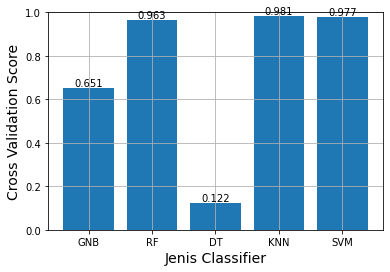

time: 204 ms (started: 2022-06-27 06:04:37 +00:00)


In [24]:
import matplotlib.pyplot as plt

# labels for bars
x = ['GNB', 'RF', 'DT', 'KNN', 'SVM']

# heights of bars
y = [round(nb_cvs,3), round(rf_cvs,3), round(dt_cvs,3), round(knn_cvs1,3), round(svm_cvs3,3)]
 
# plotting a bar chart
plt.bar(x, y)

# add value labels
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha="center", va="bottom")

# plot title
# plt.title('Perbandingan Cross Validation Score untuk tiap jenis Classifier', fontsize=14)
# naming the x-axis
plt.xlabel('Jenis Classifier', fontsize=14)
# naming the y-axis
plt.ylabel('Cross Validation Score', fontsize=14)

plt.ylim(0,1)

plt.grid(True)
# function to show the plot
plt.show()

#Testing

In [25]:
def load_single_image_files(path):
    images = []
    img = cv2.imread(path)
    # smoothing
    img_pred = cv2.GaussianBlur(img, (5, 5), 0)
    # sharpening
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    img_pred = cv2.filter2D(img_pred, -1, kernel)
    # resize
    img_pred = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    # ubah rentang pixel yang awalnya 0 - 255 menjadi 0 - 1 (tidak dilakukan juga gapapa)
    img_pred = img_pred / 255
    # algoritma nearest neighbour bekerja pada 1 dimensi
    # ada 3 perkalian karena gambar berwarna, punya 3 channel rgb
    img_pred = img_pred.reshape(img_pred.shape[0] * img_pred.shape[1] * img_pred.shape[2])
    
    # masukkan ke list images
    images.append(img_pred)
    
    X = np.array(images)
    return X

time: 13.4 ms (started: 2022-06-27 06:04:38 +00:00)


Saving hand1_9_bot_seg_1_cropped.jpeg to hand1_9_bot_seg_1_cropped.jpeg

Prediksi menggunakan Gaussian Naive Bayes
['9']

Prediksi menggunakan Random Forest
['9']

Prediksi menggunakan DT (Decission Tree) Classifier
['9']

Prediksi menggunakan K-Nearest Neighbor
['9']

Prediksi menggunakan SVM (Support Vector Machine) Classifier
['9']



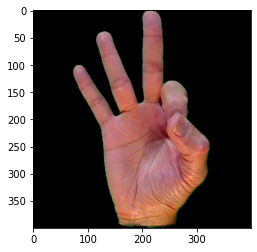

time: 17.2 s (started: 2022-06-27 06:49:38 +00:00)


In [37]:
from matplotlib import image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  #Predicting images
  path = fn

  X_single = load_single_image_files(path)

  img =  cv2.imread(path)
  imgshow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  imgplot = plt.imshow(imgshow)

  print("")

  nb_pred_single = gnb.predict(X_single)
  print("Prediksi menggunakan Gaussian Naive Bayes")
  print(nb_pred_single)

  print("")

  rf_pred_single = rf.predict(X_single)
  print("Prediksi menggunakan Random Forest")
  print(rf_pred_single)

  print("")
  
  dt_pred_single = DTprediction(X_single, clf_gini)
  print("Prediksi menggunakan DT (Decission Tree) Classifier")
  print(dt_pred_single)

  print("")

  knn_pred_single = knn.predict(X_single)
  print("Prediksi menggunakan K-Nearest Neighbor")
  print(knn_pred_single)

  print("")

  svm_pred_single = clf.predict(X_single)
  print("Prediksi menggunakan SVM (Support Vector Machine) Classifier")
  print(svm_pred_single)

  print("")